In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Split the data into features and output.
X = np.array(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
y = np.array(df['quality'])

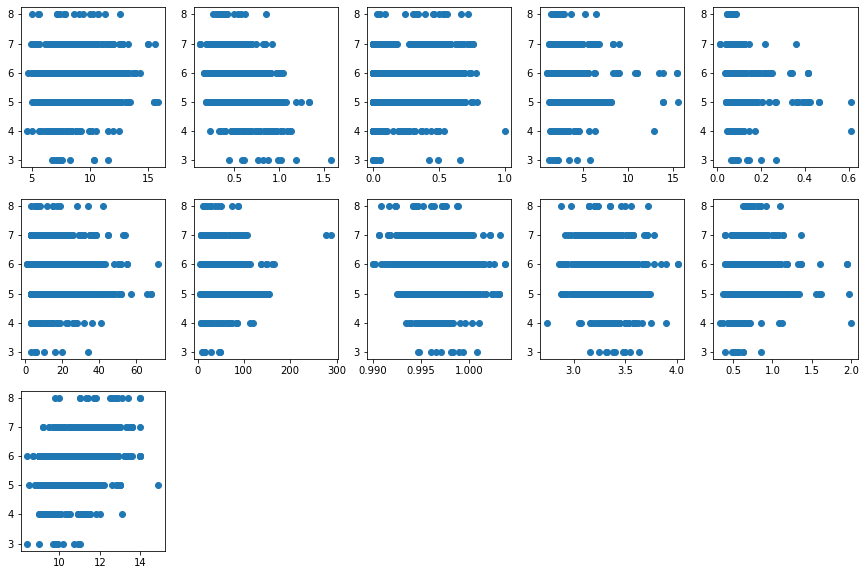

In [4]:
#Graph each feature and output to see the correlation
plt.figure(figsize = (15,10))
plt.subplot(3,5,1)
plt.plot(df['fixed acidity'], df['quality'], 'o')
plt.subplot(3,5,2)
plt.plot(df['volatile acidity'], df['quality'], 'o')
plt.subplot(3,5,3)
plt.plot(df['citric acid'], df['quality'], 'o')
plt.subplot(3,5,4)
plt.plot(df['residual sugar'], df['quality'], 'o')
plt.subplot(3,5,5)
plt.plot(df['chlorides'], df['quality'], 'o')
plt.subplot(3,5,6)
plt.plot(df['free sulfur dioxide'], df['quality'], 'o')
plt.subplot(3,5,7)
plt.plot(df['total sulfur dioxide'], df['quality'], 'o')
plt.subplot(3,5,8)
plt.plot(df['density'], df['quality'], 'o')
plt.subplot(3,5,9)
plt.plot(df['pH'], df['quality'], 'o')
plt.subplot(3,5,10)
plt.plot(df['sulphates'], df['quality'], 'o')
plt.subplot(3,5,11)
plt.plot(df['alcohol'], df['quality'], 'o')

In [5]:
#split the dataset into training data and test data.
from sklearn.model_selection import train_test_split

Xtr,Xts,ytr,yts = train_test_split(X, y, test_size = 0.25)


In [6]:
#I started with a multiple linear regression. 
from sklearn import linear_model
from sklearn.metrics import r2_score
regr = linear_model.LinearRegression()
regr.fit(Xtr, ytr)
yhat = regr.predict(Xts)
rsq = r2_score(yts, yhat)
print(rsq)
acc = np.mean(yts == yhat)
print(acc)

0.3549300319154124
0.0


In [7]:
#I got an accuracy of 0% for linear regression, so I switched to logistic regression 
#to see if it would increase the accuracy.
from sklearn import linear_model
from sklearn.metrics import r2_score
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(Xtr, ytr)
yhat = logreg.predict(Xts)
rsq = r2_score(yts, yhat)
print(rsq)
acc = np.mean(yts == yhat)
print(acc)

0.21286041581504123
0.585


C:\Users\tzhen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
#I also tried a SVM to see if a SVM would improve on the accuracy.
from sklearn import svm
svc = svm.SVC(probability = False, kernel = 'rbf', C=2.8, gamma = 0.0073, verbose = 10)
svc.fit(Xtr, ytr)
yhat = svc.predict(Xts)
rsq = r2_score(yts, yhat)
print(rsq)
acc = np.mean(yts == yhat)
print(acc)

[LibSVM]0.01512486809708058
0.52


In [9]:
svc = svm.SVC(probability = False, kernel = 'rbf', C=10, gamma = 1, verbose = 10)
svc.fit(Xtr, ytr)
yhat = svc.predict(Xts)
rsq = r2_score(yts, yhat)
print(rsq)
acc = np.mean(yts == yhat)
print(acc)

[LibSVM]-0.11416375925697064
0.555


In [10]:
#After some more research I tried a random forest classifier to see if it would improve on the accuracy.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(Xtr, ytr)
yhat = rfc.predict(Xts)
rsq = r2_score(yts, yhat)
print(rsq)
acc = np.mean(yts == yhat)
print(acc)

0.26229430274453147
0.6475
